In [1]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df= pd.read_csv(r'C:\Users\akhil\Desktop\python projects\Tractor-Sales.csv')
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [6]:
dates = pd.date_range(start = "2003-01-01", freq="MS", periods= len(df))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [7]:
import calendar
df["Months"] = dates.month
df["Months"] = df["Months"].apply(lambda x: calendar.month_abbr[x]) #Because of this line we will get(Jan, Feb) instead of (1st, 2nd) month

df["Year"] = dates.year

In [8]:
df.head()

,Month-Year,Number of Tractor Sold,Months,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [9]:
df.drop(["Month-Year"], axis=1, inplace= True)

In [10]:
df.head()

,Number of Tractor Sold,Months,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [14]:
df.rename(columns = {"Number of Tractor Sold":"Tractor-Sales"}, inplace= True)

In [15]:
df.set_index(dates, inplace=True)
df.head()

,Tractor-Sales,Months,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


Text(0, 0.5, 'Tractor Sales')

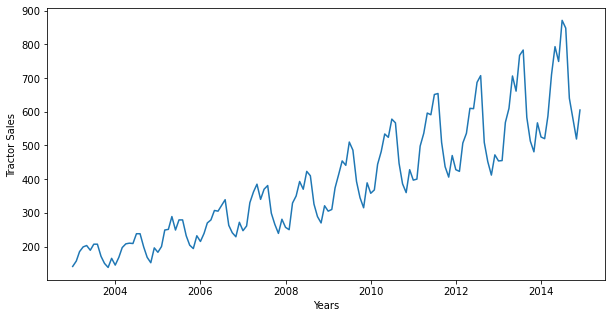

In [16]:
df_ts= df["Tractor-Sales"]
plt.figure(figsize=(10,5))
plt.plot(df_ts)
plt.xlabel("Years")
plt.ylabel("Tractor Sales")


In [17]:
roll_mean = df_ts.rolling(window=12).mean()
roll_std = df_ts.rolling(window=12).std()

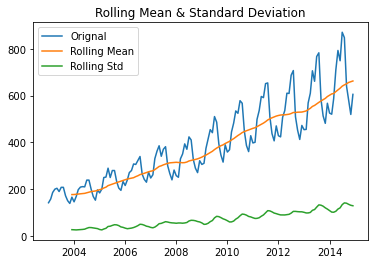

In [18]:
orig = plt.plot(df_ts, label="Orignal")
mean = plt.plot(roll_mean, label="Rolling Mean")
std = plt.plot(roll_std, label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

In [19]:
monthly_sales = pd.pivot_table(df, values= "Tractor-Sales",columns="Year",index="Months")
monthly_sales

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Months,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [20]:
monthly_sales= monthly_sales.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Months,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


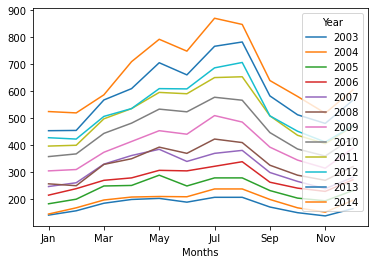

In [22]:
monthly_sales.plot()

In [23]:
yearly_sales= pd.pivot_table(df, values = "Tractor-Sales", columns = "Months", index = "Year")
yearly_sales

Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299
2008,350,410,321,250,257,423,370,329,393,270,289,326
2009,414,486,389,310,305,510,441,374,454,315,345,393
2010,482,567,428,368,358,578,524,444,534,360,386,447
2011,536,654,470,400,397,651,591,498,596,406,437,509


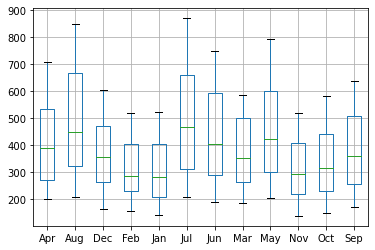

In [24]:
yearly_sales.boxplot()

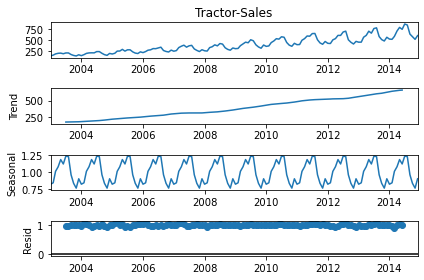

In [25]:
decomp = sm.tsa.seasonal_decompose(df_ts, model="multiplicative")
fig = decomp.plot()

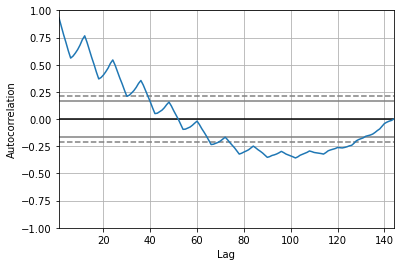

In [37]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_ts)


In [39]:
from statsmodels.tsa.arima.model import ARIMA
df_ts.index = df_ts.index.to_period('M')

In [40]:
df_ts

2003-01    141
2003-02    157
2003-03    185
2003-04    199
2003-05    203
          ... 
2014-08    848
2014-09    640
2014-10    581
2014-11    519
2014-12    605
Freq: M, Name: Tractor-Sales, Length: 144, dtype: int64

In [42]:
model = ARIMA(df_ts, order=(5,1,0))
model_fit = model.fit()

In [43]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Tractor-Sales   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -777.144
Date:                Wed, 23 Dec 2020   AIC                           1566.287
Time:                        16:14:27   BIC                           1584.064
Sample:                    01-31-2003   HQIC                          1573.511
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1690      0.142      1.190      0.234      -0.109       0.447
ar.L2         -0.0733      0.111     -0.660      0.510      -0.291       0.144
ar.L3         -0.0525      0.114     -0.461      0.6

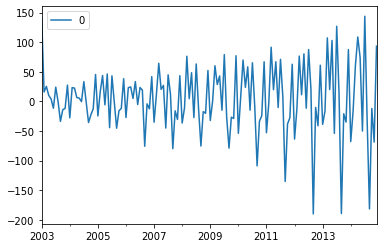

In [46]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()


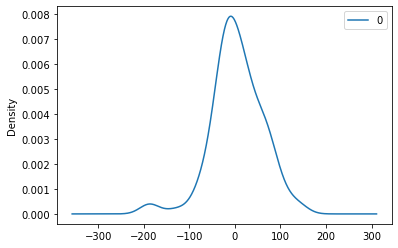

In [47]:
residuals.plot(kind='kde')

In [48]:
print(residuals.describe())

                0
count  144.000000
mean     4.862521
std     56.467483
min   -190.087360
25%    -26.833846
50%      0.025647
75%     43.014967
max    143.798339


In [65]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

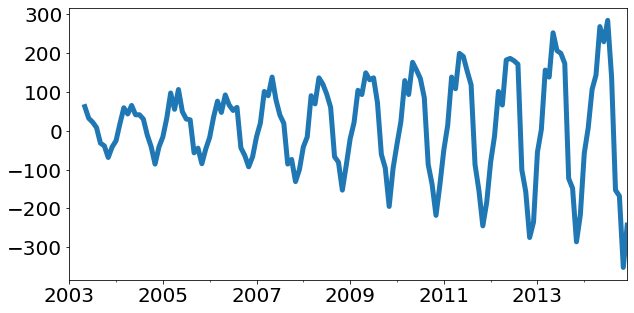

In [66]:
df_ts.diff(periods=4).plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.show()

In [68]:

from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df_ts)

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#Lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [69]:

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [70]:
adfuller_test(df_ts)

ADF Test Statistic : 1.108825059146732
p-value : 0.9952912415248419
#Lags Used : 14
Number of Observations Used : 129
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [71]:
df['Sales First Difference'] = df_ts - df_ts.shift(1)

In [72]:
df_ts.shift(1)

2003-01      NaN
2003-02    141.0
2003-03    157.0
2003-04    185.0
2003-05    199.0
           ...  
2014-08    871.0
2014-09    848.0
2014-10    640.0
2014-11    581.0
2014-12    519.0
Freq: M, Name: Tractor-Sales, Length: 144, dtype: float64

In [78]:
df['Seasonal First Difference'] = df_ts - df_ts.shift(12)

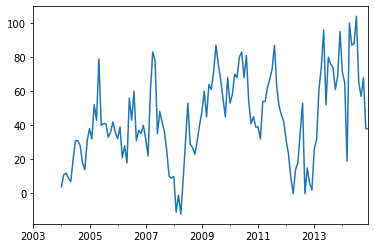

In [82]:
df['Seasonal First Difference'].plot()

In [56]:
## Rolling Forecast
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
# load dataset
def parser(x):
    return datetime.strptime('2003-01', '%Y-%m')
df = pd.read_csv(r'C:\Users\akhil\Desktop\python projects\Tractor-Sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
df.index = df.index.to_period('M')

In [58]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [59]:
size

95

In [60]:
len(X)

144

In [61]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=354.608199, expected=428.000000
predicted=447.643635, expected=397.000000
predicted=399.522917, expected=400.000000
predicted=400.983108, expected=498.000000
predicted=515.325487, expected=536.000000
predicted=526.816743, expected=596.000000
predicted=605.152158, expected=591.000000
predicted=586.886792, expected=651.000000
predicted=652.002600, expected=654.000000
predicted=653.346568, expected=509.000000
predicted=478.802334, expected=437.000000
predicted=432.463635, expected=406.000000
predicted=398.806609, expected=470.000000
predicted=490.438467, expected=428.000000
predicted=432.515415, expected=423.000000
predicted=426.611987, expected=507.000000
predicted=528.689143, expected=536.000000
predicted=525.789474, expected=610.000000
predicted=623.839756, expected=609.000000
predicted=605.559059, expected=687.000000
predicted=690.596046, expected=707.000000
predicted=709.667917, expected=509.000000
predicted=464.062840, expected=452.000000
predicted=457.105455, expected=412

Test RMSE: 82.224


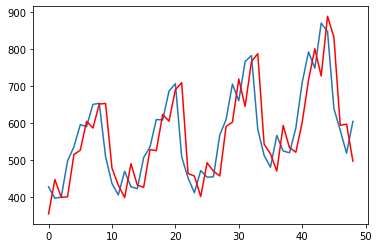

In [64]:
# evaluate forecasts
from matplotlib import pyplot
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [83]:
n_obs = 20
df_train,df_test = df[0:-n_obs],df[-n_obs :]

In [88]:
df_train_tranformed = df_train.diff().dropna()

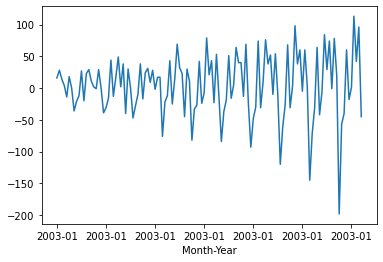

In [89]:
df_train_tranformed.plot()

In [90]:
adfuller_test(df_train_tranformed)

ADF Test Statistic : -3.4693030558298923
p-value : 0.00881135501160169
#Lags Used : 11
Number of Observations Used : 113
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
